# Baseball Case Study

## Problem Statement

#### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Importing Libraries

In [97]:
import pandas as pd # for handling dataset
import numpy as np # for mathematical operations
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [98]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\1st week\baseball.csv') 

In [99]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Dataset Description

W--- Wins

R--- Runs

AB-- At Bats

H--- Hits

2B-- Doubles 

3b-- Triples

HR-- Homeruns 

BB-- Walks

SO-- Strikeouts

SB-- Stolen Bases

RA-- Runs Allowed

ER-- Earned Runs

ERA--Earned Run Average (ERA)

SHO--Shutouts

SV-- Saves 

CG-- Complete Games

E--- Errors

In [100]:
print('Total no of rows & columns: ',df.shape) # to see number of rows & columns

Total no of rows & columns:  (30, 17)


In [101]:
print('List of columns: ',df.columns) # to display all the columns in the dataset

List of columns:  Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


In [102]:
# Let rename the columns for better understanding point of view
df=df.rename(columns={'W':'Wins','R':'Runs','AB':'AtBats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'StolenBases','RA':'RunsAllowed','ER':'EarnedRuns','Earned Run Average (ERA)':'ERA','CG':'Completegame','SHO':'Shutouts','SV':'Saves','E':'Errors'})

In [103]:
df.head() # checking the columns name

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,ERA,Completegame,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [104]:
df.isnull().sum()  # to check null values

Wins            0
Runs            0
AtBats          0
Hits            0
Doubles         0
Triples         0
Homeruns        0
Walks           0
Strikeouts      0
StolenBases     0
RunsAllowed     0
EarnedRuns      0
ERA             0
Completegame    0
Shutouts        0
Saves           0
Errors          0
dtype: int64

#### No null values in the dataset

In [105]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wins          30 non-null     int64  
 1   Runs          30 non-null     int64  
 2   AtBats        30 non-null     int64  
 3   Hits          30 non-null     int64  
 4   Doubles       30 non-null     int64  
 5   Triples       30 non-null     int64  
 6   Homeruns      30 non-null     int64  
 7   Walks         30 non-null     int64  
 8   Strikeouts    30 non-null     int64  
 9   StolenBases   30 non-null     int64  
 10  RunsAllowed   30 non-null     int64  
 11  EarnedRuns    30 non-null     int64  
 12  ERA           30 non-null     float64
 13  Completegame  30 non-null     int64  
 14  Shutouts      30 non-null     int64  
 15  Saves         30 non-null     int64  
 16  Errors        30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [106]:
df.describe() # to get high understanding of data or stats/overview of data

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,ERA,Completegame,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### The count for all features is same for the above dataset. Mean and Standard deviation also looks fine.

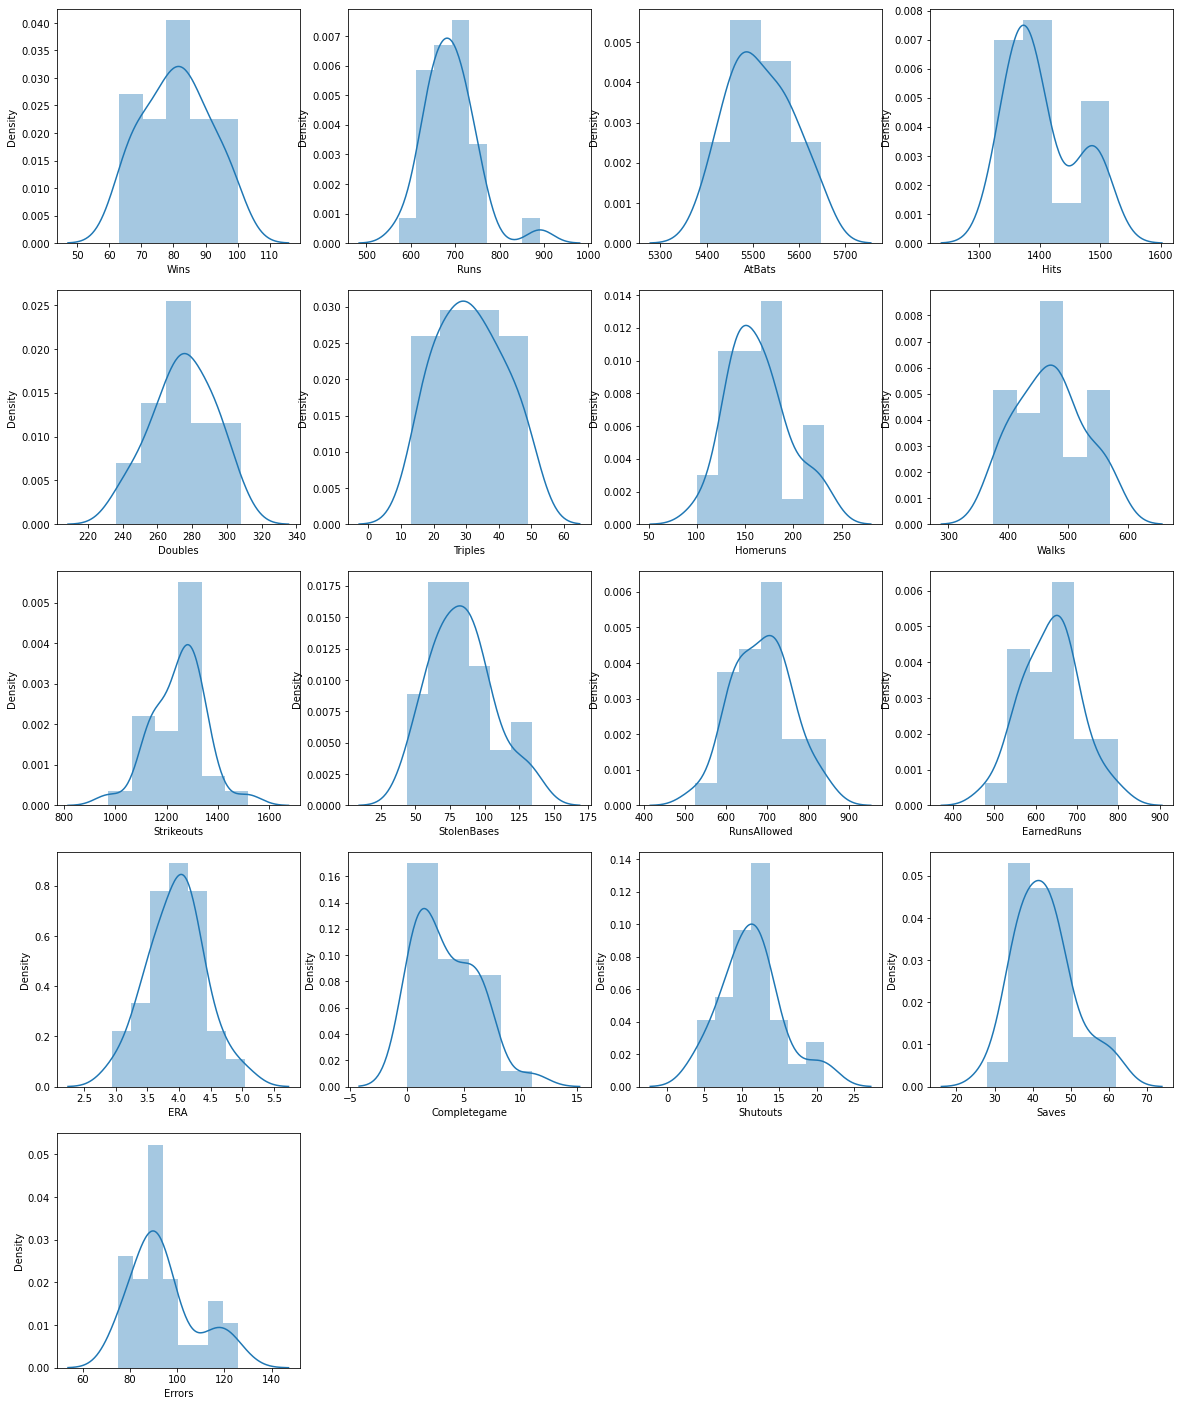

In [107]:
# lets visualize all the columns 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

#### There is no right or left considerable amount of skewed data that can be seen from the above plot for each columns other than 'runs' column

In [108]:
# removing the skewness
q = df['Runs'].quantile(0.95)
# removing the top 5% data from the Runs column
df= df[df['Runs']<q]

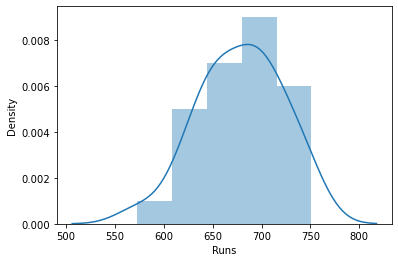

In [109]:
# lets visualize the runs column now
ax = sns.distplot(df['Runs'])

#### The data distribution looks fine now for Runs column

<AxesSubplot:xlabel='Walks', ylabel='Wins'>

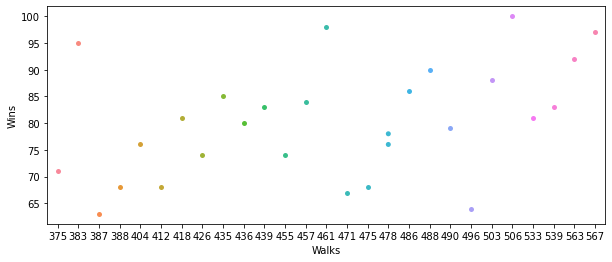

In [170]:
plt.subplots(figsize=(10,4))
sns.swarmplot(x='Walks', y='Wins', data=df)

#### As the Walks (batter gets first base easily after four pitches) are increasing then the chances of wins increases from the above plot

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

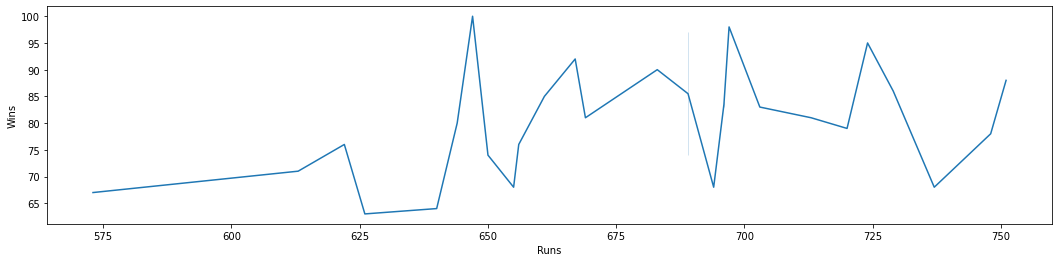

In [111]:
plt.subplots(figsize=(18,4))
sns.lineplot(x='Runs', y='Wins', data=df)

#### Runs scored does not give assurity for win always as shown in graph 

<AxesSubplot:xlabel='Shutouts', ylabel='Wins'>

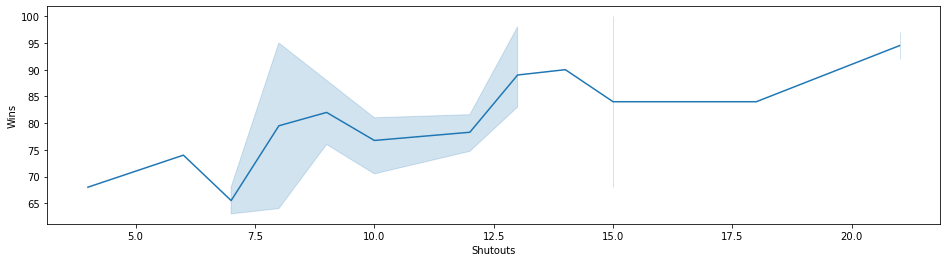

In [112]:
plt.subplots(figsize=(16,4))
sns.lineplot(x='Shutouts', y='Wins', data=df)

#### More the Shutouts the pitcher does, its obvious that more is the chance of win which is shown in above graph

<AxesSubplot:xlabel='EarnedRuns', ylabel='Wins'>

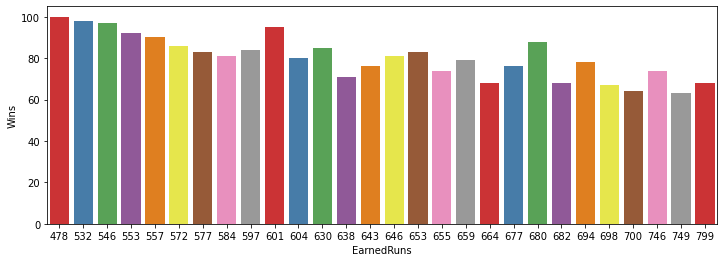

In [113]:
# to visualize Earned Runs relation with Wins
plt.subplots(figsize=(12,4))
sns.barplot(x='EarnedRuns', y='Wins', data=df, palette='Set1')

<AxesSubplot:xlabel='Homeruns', ylabel='Wins'>

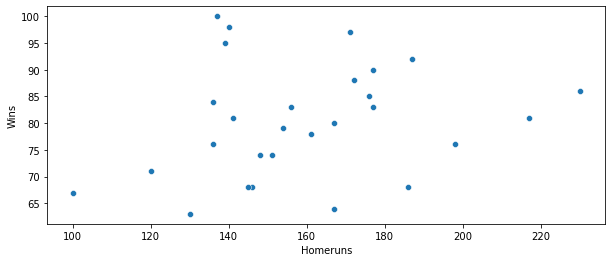

In [168]:
# visualizing Homeruns vs Wins
plt.subplots(figsize=(10,4))
sns.scatterplot(x='Homeruns', y='Wins', data=df, palette='Set1')

#### The plot is showing Homeruns range (130-180) giving good number of Wins

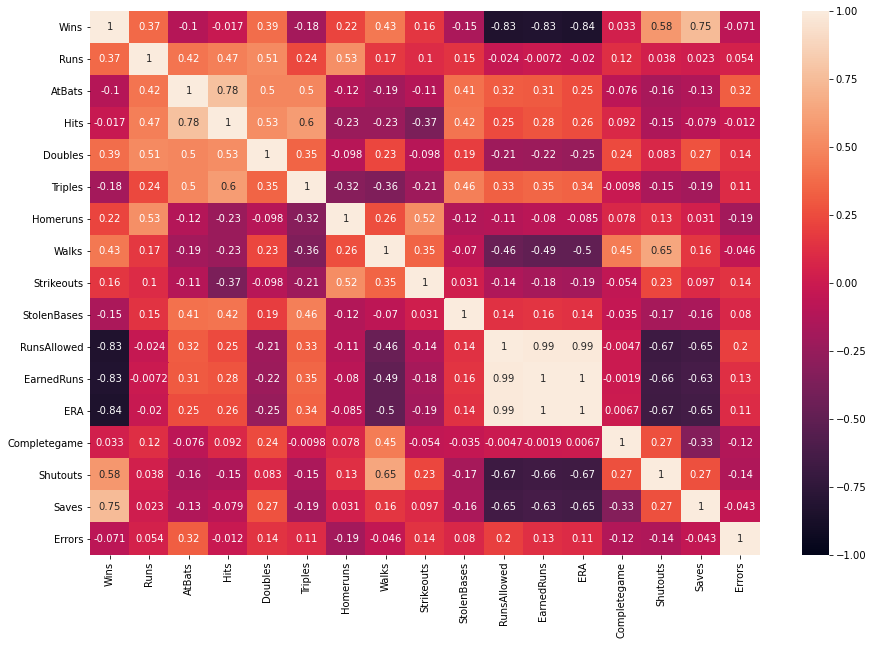

In [116]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### From the heat map we can say that Saves is mostly correlated to the wins.Then we also have shutouts,walks,runs,double contributing to wins

In [117]:
# dropping these columns as they show negative relationship with the label/target
df=df.drop(columns=['ERA','RunsAllowed'])

In [118]:
df.head()

,Wins,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,EarnedRuns,Completegame,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,601,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,653,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,584,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,643,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,746,7,12,35,86


In [119]:
last_column = df.pop('Wins')

In [120]:
df.insert(14, 'Wins', last_column)  # inserting Win column at the last as its our target/label

In [121]:
df.head()

,Runs,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,EarnedRuns,Completegame,Shutouts,Saves,Errors,Wins
0,724,5575,1497,300,42,139,383,973,104,601,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,653,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,584,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,643,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,746,7,12,35,86,74


In [122]:
y = df['Wins']
X = df.drop('Wins', axis = 1)

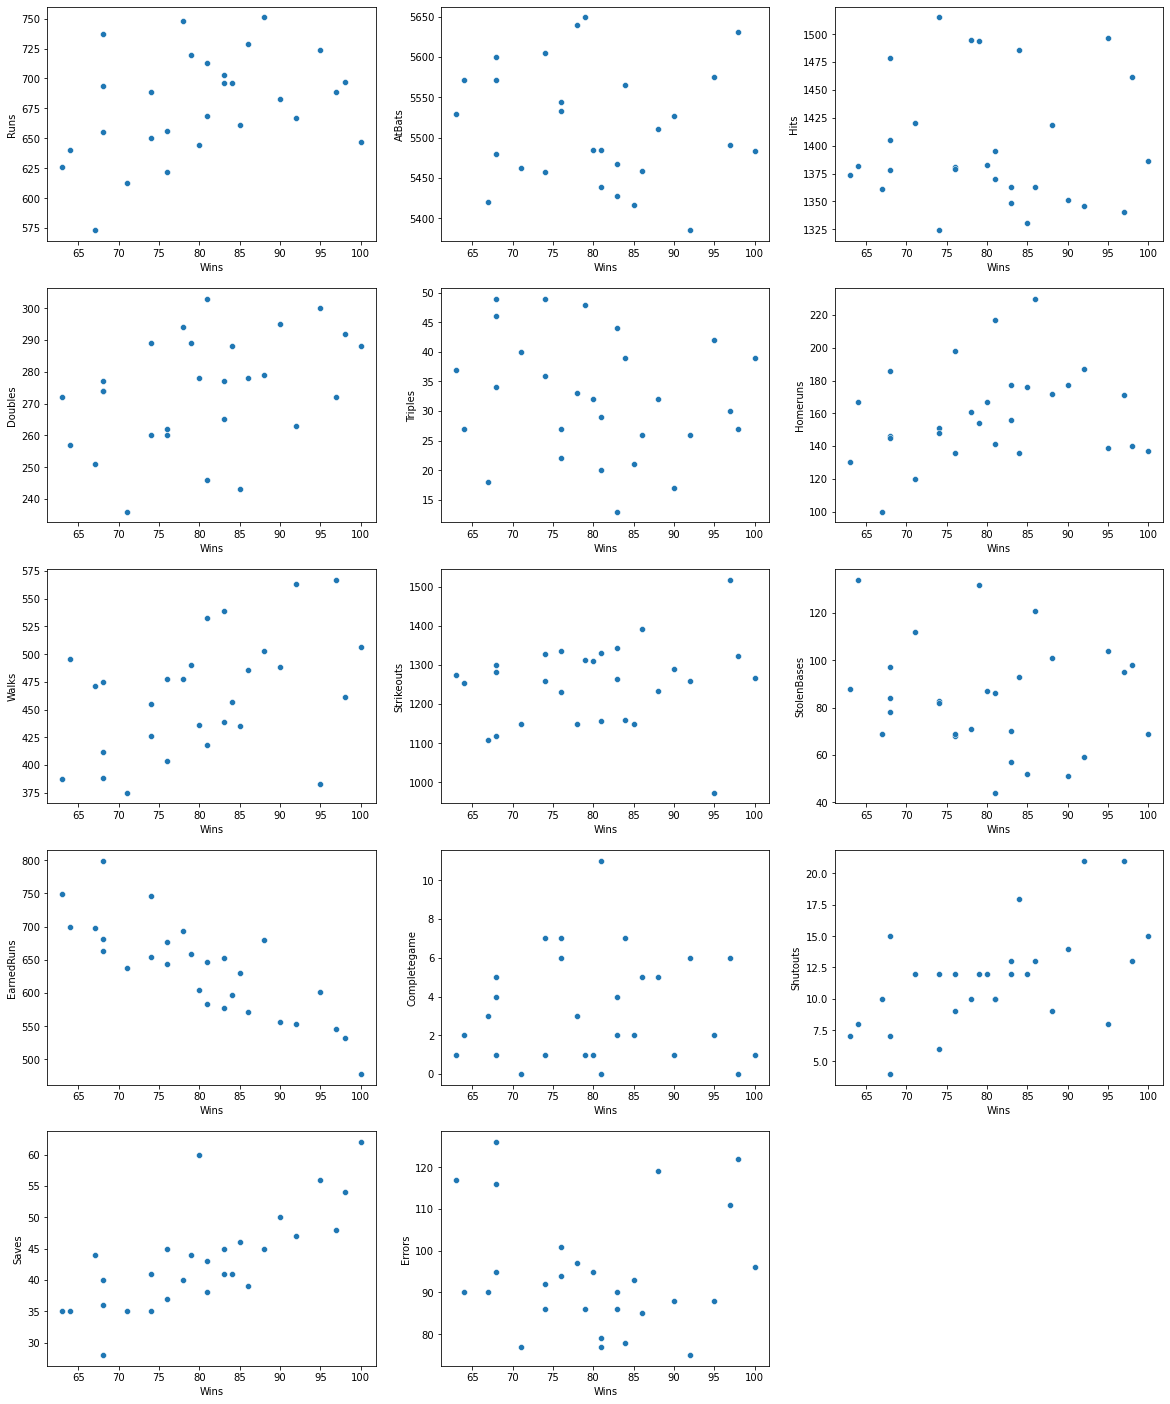

In [123]:
# Using scatterplot to find the relationship 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.scatterplot(y,X[column])
    plotnumber+=1
plt.show()

#### Above plot we can draw inference that Saves,shutouts,Walks,Runs has good relationship with Wins

In [124]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,6.053725,Runs
1,5.405837,AtBats
2,8.451842,Hits
3,4.124112,Doubles
4,3.219189,Triples
5,5.892285,Homeruns
6,3.813480,Walks
7,2.167172,Strikeouts
8,1.901305,StolenBases
9,5.121062,EarnedRuns


#### Here Multicollinearity problem exists as Hits and Runs are inter-related to each other.

In [126]:
# dropping Hits column to overcome multicollinearity
df=df.drop(columns=['Hits'])

In [127]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 41)

In [128]:
y_train.head()

16    98
10    88
19    64
11    86
25    92
Name: Wins, dtype: int64

In [129]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [130]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.9448591371549008

In [131]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.8191850664596412

In [132]:
# To cross verify
y_pred = regression.predict(x_test)

In [133]:
r2_score(y_test,y_pred)

0.8191850664596412

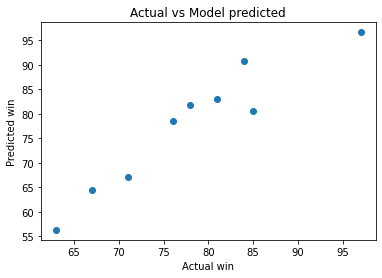

In [134]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual win')
plt.ylabel('Predicted win')
plt.title('Actual vs Model predicted')
plt.show()

In [135]:
mean_absolute_error(y_test,y_pred)

3.6440584303103187

In [136]:
mean_squared_error(y_test,y_pred)

17.157328138162942

In [137]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.142140526124499

### Using Regularization method to check whether our regression model is overfitting or not

In [138]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [139]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [140]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.22051618404475892

In [141]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.22051618404475892)

In [142]:
lasso_reg.score(x_test,y_test)

0.8717906654298895

### Using Ridge regression model

In [143]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [144]:
ridgecv.alpha_

0.09099999999999998

In [145]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [146]:
ridge_model.score(x_test,y_test)

0.8358869528027739

#### So we can see by using different type of regularization,we still are getting almost same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

### Decision Tree Regressor

In [147]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 76.23%
______________________________________________


In [148]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-1.70663562  0.3203478   0.08888889]
-0.43246631055176704
0.905915332462338


### Random Forest Regressor

In [149]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=41)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 91.79%
______________________________________________

===================Test Result======================
Accuracy Score: 68.72%
______________________________________________


In [150]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-1.13007887  0.49606254  0.55785208]
-0.025388081552002967
0.781541550050907


### KNN Regressor

In [151]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 65.85%
______________________________________________

===================Test Result======================
Accuracy Score: 57.11%
______________________________________________


In [152]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-1.54365541  0.14687936  0.41938889]
-0.3257957199125635
0.8683133208436269


In [153]:
# using bagging over our KNN regressor and see if our score improve:
from sklearn.ensemble import BaggingRegressor

In [154]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=6),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True,random_state=3,oob_score=True)

In [155]:
# lets check the out of bag score
bag_knn.oob_score

True

In [156]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.06202250845693491

In [157]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.765747443441173

In [158]:
#xgboost
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.7953166994592693

## Using GridSearchCV for hyper parameter tuning on best model (linear Regression)

In [159]:
grid_param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [160]:
grid_search = GridSearchCV(estimator=regression,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [162]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [163]:
regression = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
regression.fit(x_train,y_train)

LinearRegression(normalize=True)

In [164]:
regression.score(x_test,y_test)

0.8191850664596417

In [ ]:
# After applying hyperparameter tuning still getting same score

### Choosing Linear Regression as the model to save for production because it is giving good accuracy score than other models.

## Model Saving

In [165]:
# saving the model to local system
filename = 'baseball_model.pickle'
pickle.dump(regression,open(filename,'wb'))